# Prediction using Supervised ML

## By - Shanmukha Sai Ganesh Sripada

This is a task of predicting the percentage of a student based on the number of study hours
The supervised learning algorithm used for this task is simple linear regression

## Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [4]:
url = 'http://bit.ly/w-data'
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
X = dataset.iloc[:, :-1]   #Feature Matrix
y = dataset.iloc[:, 1]     #Dependent Variable Vector

### Dealing with missing data (if any)

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

### Plotting a scatter plot

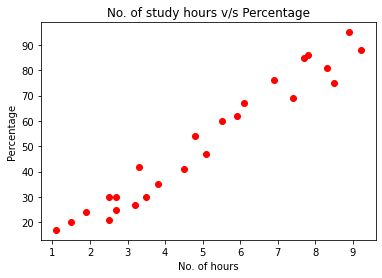

In [13]:
plt.scatter(X, y, color='red')
plt.title('No. of study hours v/s Percentage')
plt.xlabel('No. of hours')
plt.ylabel('Percentage')
plt.show()

### Splitting training and testing data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Performing Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting test set values

In [10]:
y_pred = model.predict(X_test)

## Visualizing

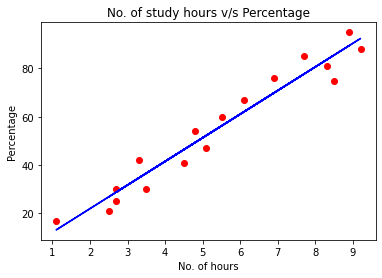

In [14]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('No. of study hours v/s Percentage')
plt.xlabel('No. of hours')
plt.ylabel('Percentage')
plt.show()

### Visualizing test set results

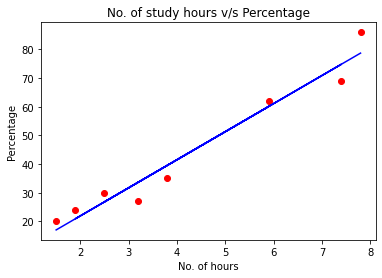

In [15]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('No. of study hours v/s Percentage')
plt.xlabel('No. of hours')
plt.ylabel('Percentage')
plt.show()

In [17]:
frame = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
frame

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


### Actual values v/s Predicted values visualization

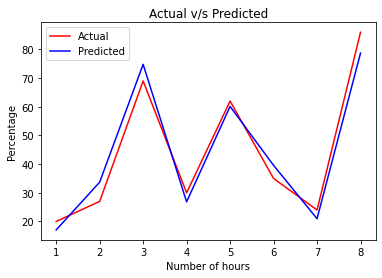

In [23]:
x = [i for i in range(1, 9, 1)]
plt.plot(x, y_test, color='red', label='Actual')
plt.plot(x, y_pred, color='blue', label='Predicted')
plt.title('Actual v/s Predicted')
plt.xlabel("Number of hours")
plt.ylabel("Percentage")
plt.legend()
plt.show()

## Evaluating the model

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rs = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ",mae)
print("R2 Score: ", rs)

Mean squared error:  22.96509721270043
Mean absolute error:  4.419727808027652
R2 Score:  0.9568211104435257


## Predicting score for given value

Predicting the percentage if a student studies 9.25 hours/day

In [29]:
y_newpred = model.predict([[9.25]])
print(y_newpred)

[92.91505723]


If the student studies 9.25 hours/day he scores 92.915%